# Project 1
# Feature Forge: Crafting New Insights from Raw Sales Data
Students are provided with a raw transactional sales dataset (e.g., customer purchases including product details, quantity, price, date, and customer demographics). Their task is to go beyond basic exploration by "forging" new, insightful features from the existing data using NumPy and Pandas. Examples might include 'average transaction value', 'customer lifetime value proxy', 'days since last purchase', 'product category profitability', or 'discount effectiveness'. They must thoroughly clean the raw data, engineer these new features, and then use Matplotlib and Seaborn to visually compare how these engineered features potentially reveal stronger patterns, correlations (LinAlg), or deeper business insights (e.g., identifying high-value customer segments, product performance) than the original raw attributes. The project tests their ability to transform and enrich data to unlock new analytical perspectives.

# Importing

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data

In [138]:
data = {
    "CustomerID": [1, 1, 2, 2, 3, 3, 3],
    "Product": ["Coffee", "Bariyani", "Choclate", "Bariyani", "Pizza", "Pasta", "Bariyani"],
    "BoughtBySellerPrice": [50, 100, 50, 75, 100, 75, 50],
    "Quantity": [2, 1, 3, 5, 2, 1, 4],
    "Price": [100, 200, 100, 150, 200, 150, 100],
    "Discount": [0, 20, 0, 0, 10, 0, 0],
    "CustomerSatisfaction": ["UnSatisfied", "Satisfied", "UnSatisfied", "UnSatisfied", "Satisfied", "UnSatisfied", "UnSatisfied"],
    "Date": pd.to_datetime([
        "2023-01-01", "2023-01-10", "2023-01-05",
        "2023-01-20", "2023-01-02", "2023-01-18", "2023-02-01"
    ])
}

Data frame

In [139]:
data_frame = pd.DataFrame(data)
data_frame

,CustomerID,Product,BoughtBySellerPrice,Quantity,Price,Discount,CustomerSatisfaction,Date
0,1,Coffee,50,2,100,0,UnSatisfied,2023-01-01
1,1,Bariyani,100,1,200,20,Satisfied,2023-01-10
2,2,Choclate,50,3,100,0,UnSatisfied,2023-01-05
3,2,Bariyani,75,5,150,0,UnSatisfied,2023-01-20
4,3,Pizza,100,2,200,10,Satisfied,2023-01-02
5,3,Pasta,75,1,150,0,UnSatisfied,2023-01-18
6,3,Bariyani,50,4,100,0,UnSatisfied,2023-02-01


Quantity of each product sold

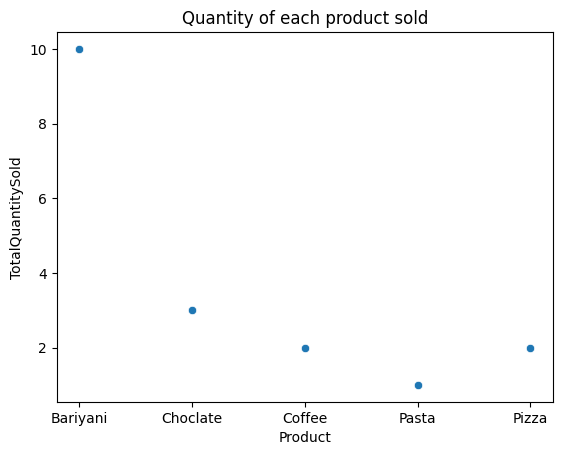

In [140]:
quantity = data_frame.groupby("Product")["Quantity"].sum().reset_index()
quantity.columns = ["Product", "TotalQuantitySold"]

sns.scatterplot(x="Product", y="TotalQuantitySold", data=quantity)
plt.title("Quantity of each product sold")
plt.show()

Calulating discounted price and creating (a new column)

In [141]:
price = data_frame["Price"]
discount = data_frame["Discount"]

discounted_price = price - (price * (discount / 100))

data_frame["DiscountedPrice"] = discounted_price
data_frame

,CustomerID,Product,BoughtBySellerPrice,Quantity,Price,Discount,CustomerSatisfaction,Date,DiscountedPrice
0,1,Coffee,50,2,100,0,UnSatisfied,2023-01-01,100.0
1,1,Bariyani,100,1,200,20,Satisfied,2023-01-10,160.0
2,2,Choclate,50,3,100,0,UnSatisfied,2023-01-05,100.0
3,2,Bariyani,75,5,150,0,UnSatisfied,2023-01-20,150.0
4,3,Pizza,100,2,200,10,Satisfied,2023-01-02,180.0
5,3,Pasta,75,1,150,0,UnSatisfied,2023-01-18,150.0
6,3,Bariyani,50,4,100,0,UnSatisfied,2023-02-01,100.0


Discounted price vs price


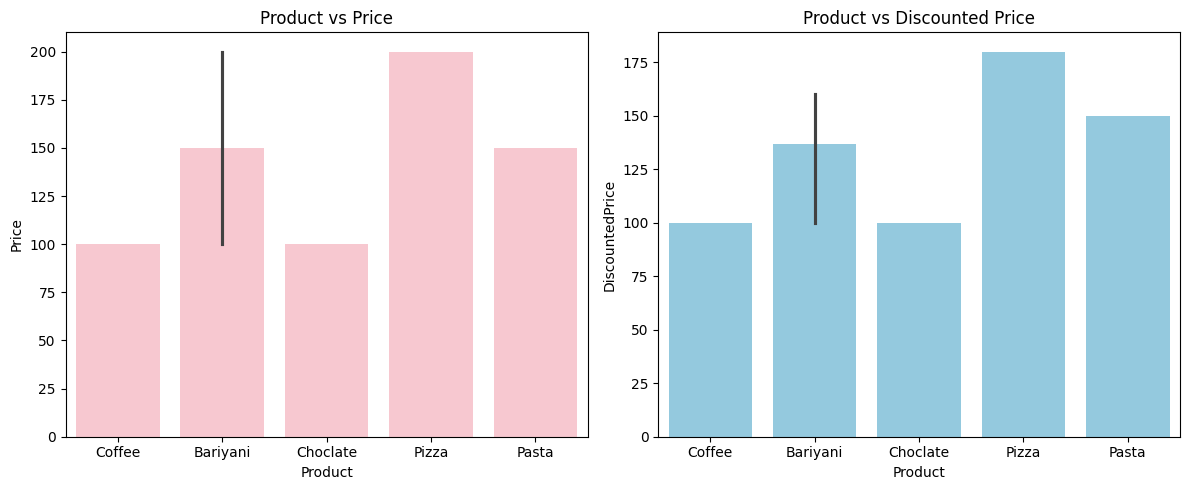

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=data_frame, x="Product", y="Price", ax=axes[0], color="pink")
axes[0].set_title("Product vs Price")

sns.barplot(data=data_frame, x="Product", y="DiscountedPrice", ax=axes[1], color="skyblue")
axes[1].set_title("Product vs Discounted Price")

plt.tight_layout()
plt.show()

Revenue pre product (a new columns)

In [143]:
data_frame["RevenueByProduct"] = data_frame["DiscountedPrice"] - data_frame["BoughtBySellerPrice"]
data_frame

,CustomerID,Product,BoughtBySellerPrice,Quantity,Price,Discount,CustomerSatisfaction,Date,DiscountedPrice,RevenueByProduct
0,1,Coffee,50,2,100,0,UnSatisfied,2023-01-01,100.0,50.0
1,1,Bariyani,100,1,200,20,Satisfied,2023-01-10,160.0,60.0
2,2,Choclate,50,3,100,0,UnSatisfied,2023-01-05,100.0,50.0
3,2,Bariyani,75,5,150,0,UnSatisfied,2023-01-20,150.0,75.0
4,3,Pizza,100,2,200,10,Satisfied,2023-01-02,180.0,80.0
5,3,Pasta,75,1,150,0,UnSatisfied,2023-01-18,150.0,75.0
6,3,Bariyani,50,4,100,0,UnSatisfied,2023-02-01,100.0,50.0


Revenue per product by quantity (a new column)

In [144]:
data_frame["RevenueByProductByQuantity"] = (data_frame["DiscountedPrice"] * data_frame["Quantity"])- (data_frame["BoughtBySellerPrice"] * data_frame["Quantity"])
data_frame

,CustomerID,Product,BoughtBySellerPrice,Quantity,Price,Discount,CustomerSatisfaction,Date,DiscountedPrice,RevenueByProduct,RevenueByProductByQuantity
0,1,Coffee,50,2,100,0,UnSatisfied,2023-01-01,100.0,50.0,100.0
1,1,Bariyani,100,1,200,20,Satisfied,2023-01-10,160.0,60.0,60.0
2,2,Choclate,50,3,100,0,UnSatisfied,2023-01-05,100.0,50.0,150.0
3,2,Bariyani,75,5,150,0,UnSatisfied,2023-01-20,150.0,75.0,375.0
4,3,Pizza,100,2,200,10,Satisfied,2023-01-02,180.0,80.0,160.0
5,3,Pasta,75,1,150,0,UnSatisfied,2023-01-18,150.0,75.0,75.0
6,3,Bariyani,50,4,100,0,UnSatisfied,2023-02-01,100.0,50.0,200.0


Revenue by product vs revenue by product by quantity

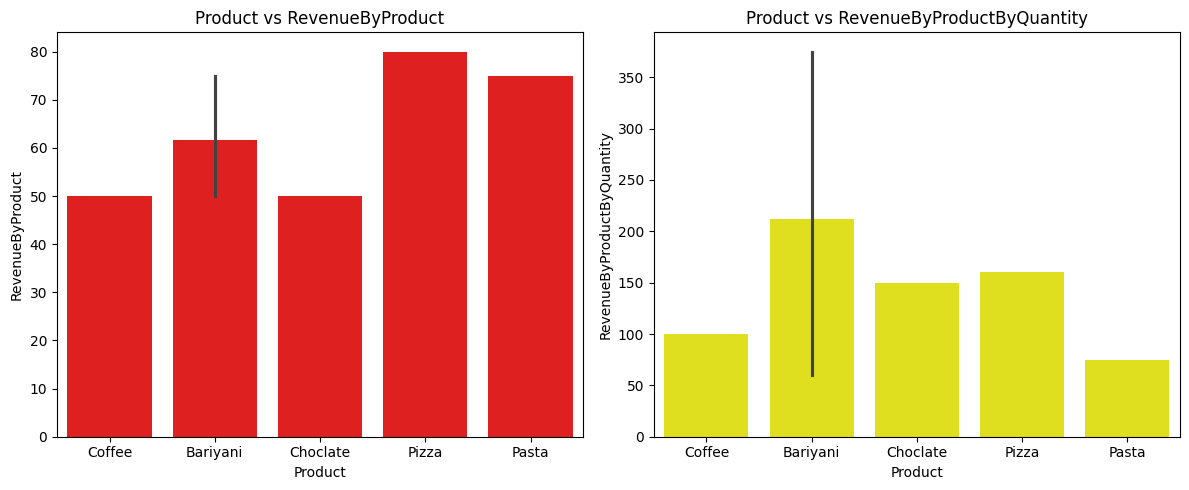

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=data_frame, x="Product", y="RevenueByProduct", ax=axes[0], color="red")
axes[0].set_title("Product vs RevenueByProduct")

sns.barplot(data=data_frame, x="Product", y="RevenueByProductByQuantity", ax=axes[1], color="yellow")
axes[1].set_title("Product vs RevenueByProductByQuantity")

plt.tight_layout()
plt.show()

Totoal revenue per customer

In [146]:
total_revenue_per_customer = (data_frame.groupby("CustomerID")["DiscountedPrice"]).sum()
total_revenue_per_customer

,DiscountedPrice
CustomerID,
1,260.0
2,250.0
3,430.0


 Quantity vs revenue generated

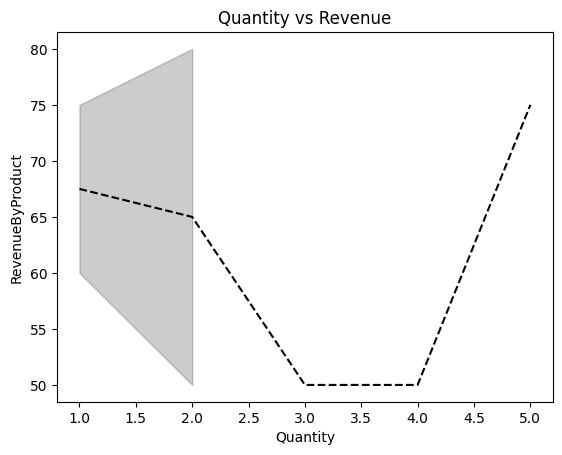

In [160]:
sns.lineplot(data=data_frame, x="Quantity", y="RevenueByProduct", color="black", linestyle="--")
plt.title("Quantity vs Revenue")
plt.show()
# ASquantity increases the revenue also increases

Average revenue per customer

In [148]:
average_revenue_per_customer = (data_frame.groupby("CustomerID")["DiscountedPrice"]).mean()
average_revenue_per_customer

,DiscountedPrice
CustomerID,
1,130.000000
2,125.000000
3,143.333333


Most purchased item by customer

In [149]:
item_counts = data_frame["Product"].value_counts()
most_purchased_item = item_counts.idxmax()
most_purchased_item

'Bariyani'

NUmber of purchases done by customer

In [150]:
number_of_purchases = data_frame.groupby("CustomerID")["Date"].count()
print("Number of purchases")
print(number_of_purchases)

Number of purchases
CustomerID
1    2
2    2
3    3
Name: Date, dtype: int64


Customer Date of purchase

Customer Purchase Dates:
CustomerID
1           [2023-01-01 00:00:00, 2023-01-10 00:00:00]
2           [2023-01-05 00:00:00, 2023-01-20 00:00:00]
3    [2023-01-02 00:00:00, 2023-01-18 00:00:00, 202...
Name: Date, dtype: object


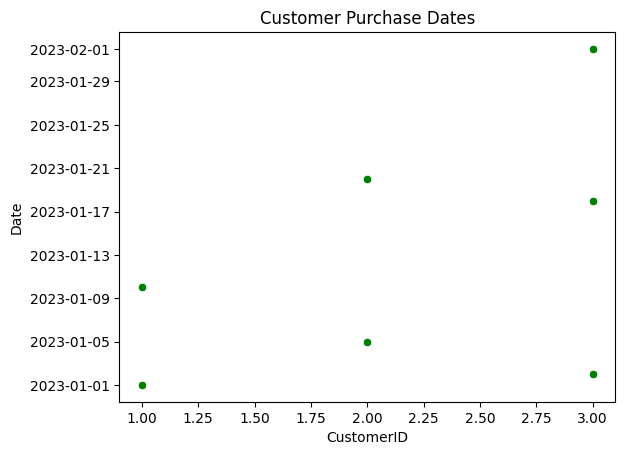

In [151]:
customer_purchase_dates = data_frame.groupby("CustomerID")["Date"].apply(list)
customer_purchase_dates
print("Customer Purchase Dates:")
print(customer_purchase_dates)

sns.scatterplot(data=data_frame, x="CustomerID", y="Date", color="green")
plt.title("Customer Purchase Dates")
plt.show()

Number of satisfied and unsatisfied customers

<Axes: xlabel='CustomerSatisfaction', ylabel='count'>

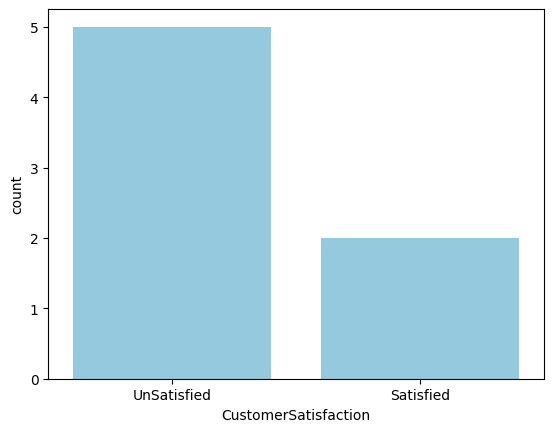

In [155]:
sns.countplot(x="CustomerSatisfaction", data=data_frame, color="skyblue")

Pair plot

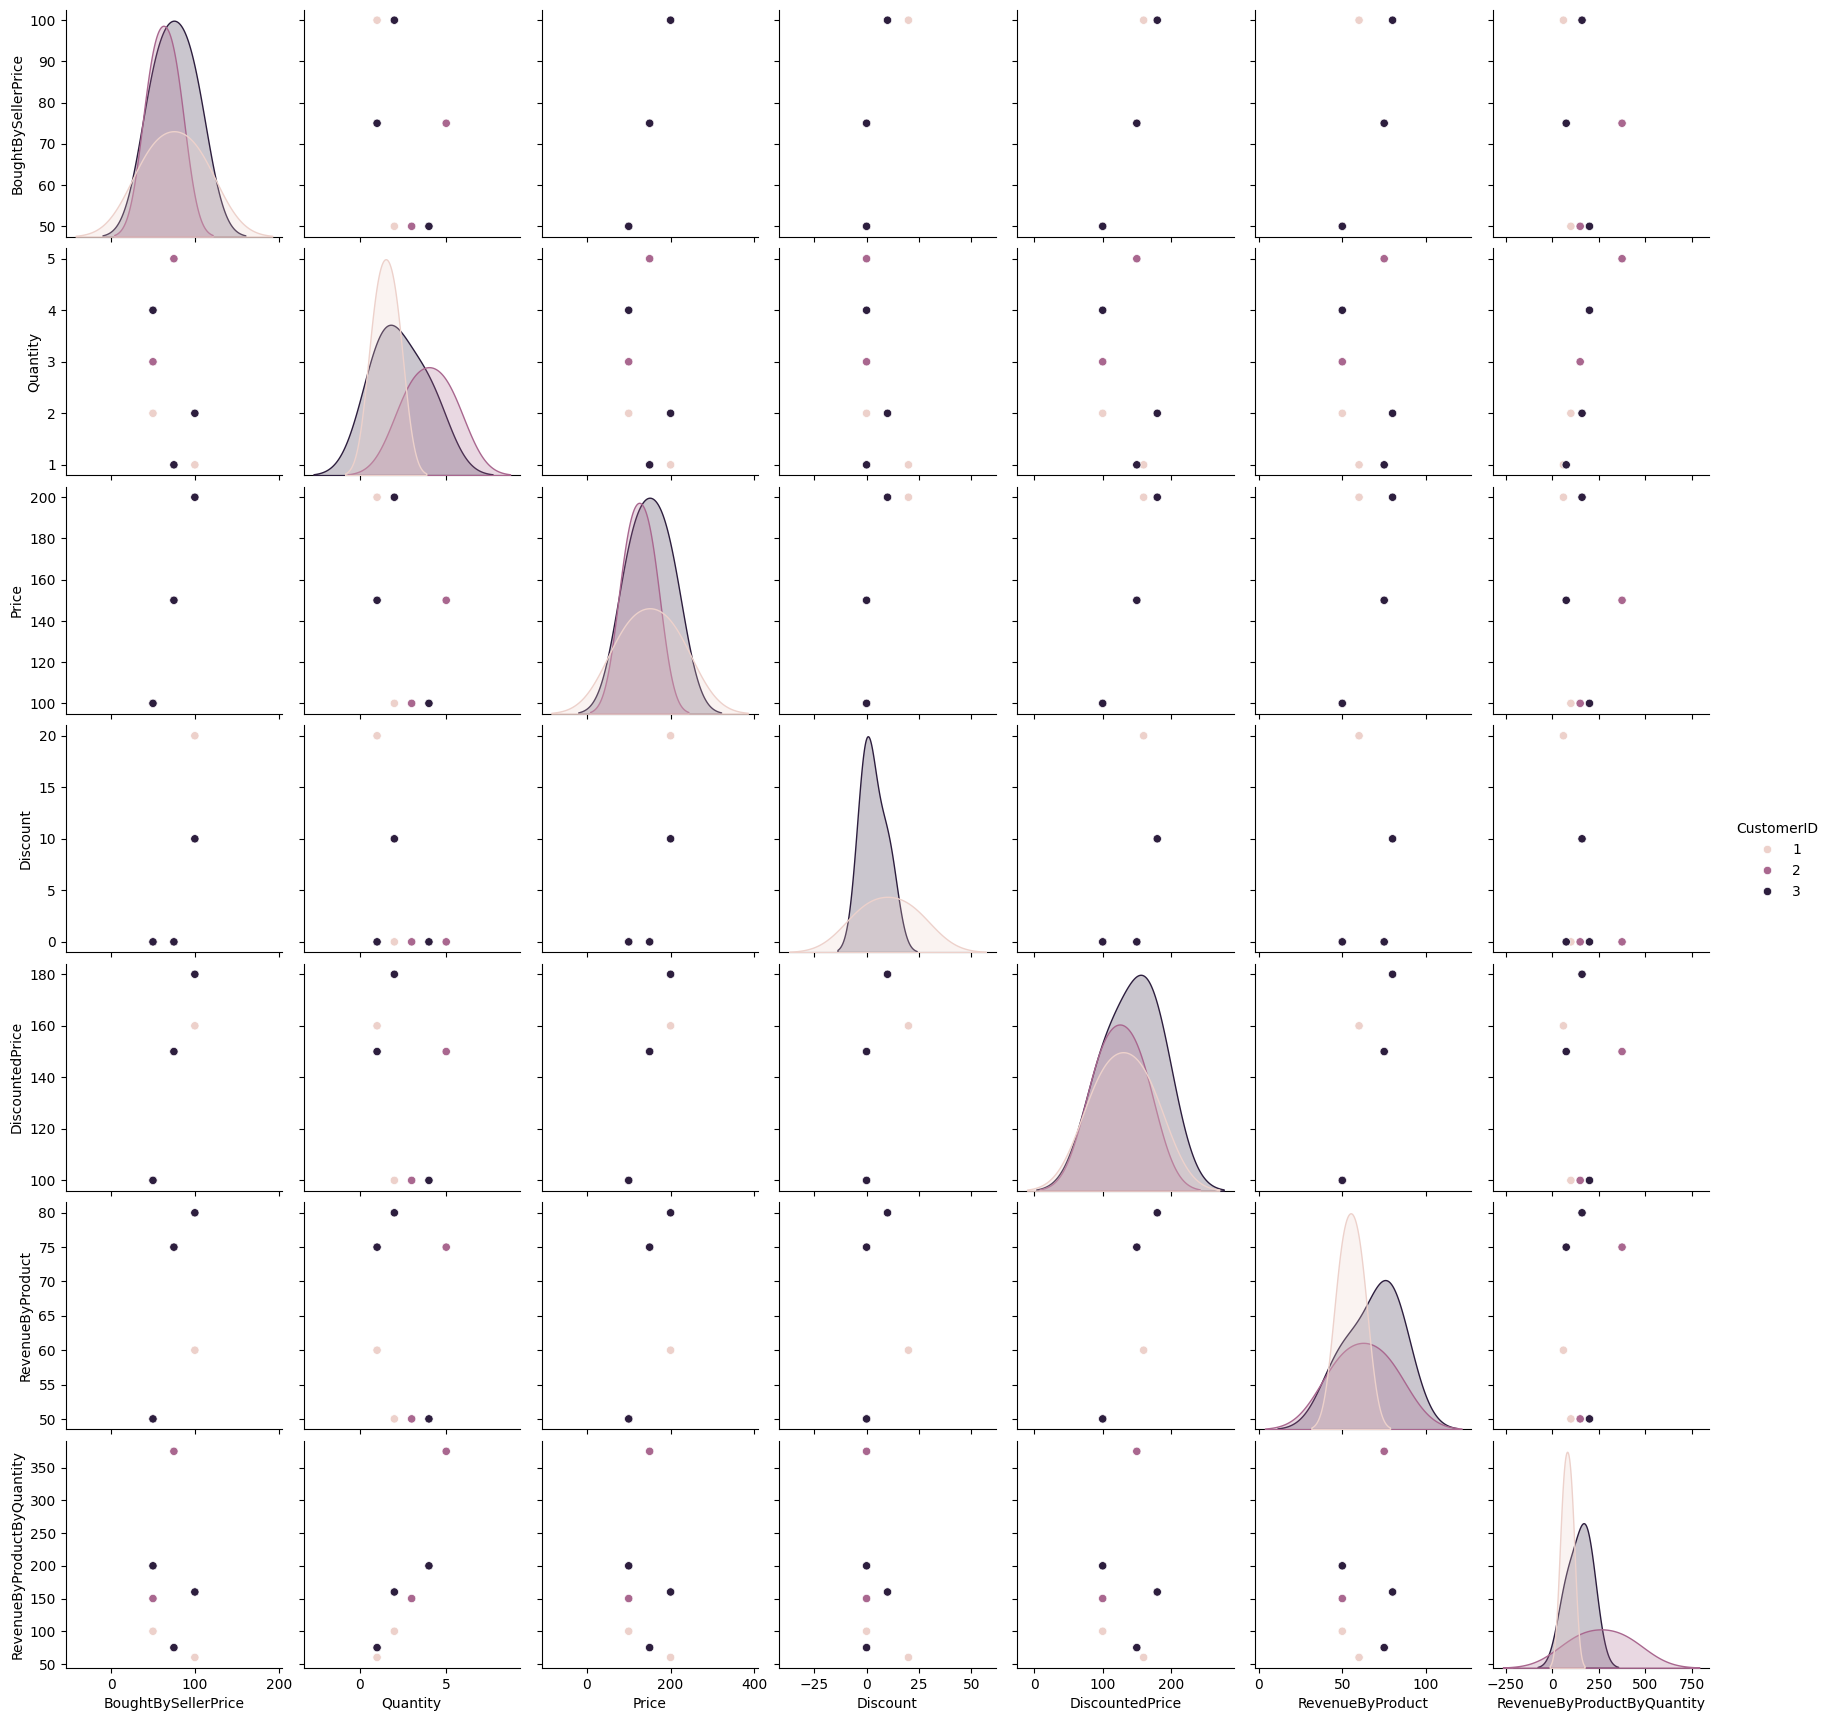

In [153]:
sns.pairplot(data_frame, hue="CustomerID")

# Project 2

Sports Player Performance Tracker & Comparison Students are given a messy dataset of player statistics from a specific sport (e.g., basketball, soccer, esports) spanning multiple seasons or sources. The dataset will contain inconsistencies such as varying player name spellings, missing game data, mixed units (e.g., 'minutes' vs. 'seconds played'), and potential duplicates. The mini-project requires students to clean and standardize this data using Pandas, handling missing values, correcting data types, and resolving naming inconsistencies. They will then use NumPy to calculate various derived performance metrics (e.g., points per game, assist-to-turnover ratio, win percentage, or custom efficiency scores). Finally, students must create visualizations using Matplotlib and Seaborn to compare player performance over time, identify top performers, or analyze team trends, demonstrating their understanding of distributions and statistical summaries from the LinAlg & Probability review.

In [212]:
data = pd.DataFrame({
    "player": ["LeBron James", "lebron james", "L. James", "Stephen Curry", "S. Curry", "Kobe Bryant", "Kobe Bryant"],
    "game": [1, 2, 3, 1, 2, 1, 1],   # duplicate for Kobe
    "points": [25, 30, np.nan, 28, 33, 40, 40],   # one missing value
    "assists": [8, 7, 9, np.nan, 10, 5, 5],       # one missing value
    "turnovers": [3, 2, 2, 4, 3, 2, 2],
    "seconds_played": ["35min", "2100sec", "33min", "1980sec", "36min", "38min", "38min"]
})
data

,player,game,points,assists,turnovers,seconds_played
0,LeBron James,1,25.0,8.0,3,35min
1,lebron james,2,30.0,7.0,2,2100sec
2,L. James,3,NaN,9.0,2,33min
3,Stephen Curry,1,28.0,NaN,4,1980sec
4,S. Curry,2,33.0,10.0,3,36min
5,Kobe Bryant,1,40.0,5.0,2,38min
6,Kobe Bryant,1,40.0,5.0,2,38min


# Preprocessing

replacing np.nan with average value of the column

In [213]:
data["points"] = data["points"].replace(np.nan, 0)
data["points"] = data["points"].replace(0, np.mean(data["points"]))
data["assists"] = data["assists"].replace(np.nan, 0)
data["assists"] = data["assists"].replace(0, np.mean(data["points"]))
data

,player,game,points,assists,turnovers,seconds_played
0,LeBron James,1,25.0,8.0,3,35min
1,lebron james,2,30.0,7.0,2,2100sec
2,L. James,3,28.0,9.0,2,33min
3,Stephen Curry,1,28.0,32.0,4,1980sec
4,S. Curry,2,33.0,10.0,3,36min
5,Kobe Bryant,1,40.0,5.0,2,38min
6,Kobe Bryant,1,40.0,5.0,2,38min


Converting names

In [214]:
names = {
    "lebron james": "LeBron James",
    "L. James": "LeBron James",
    "S. Curry": "Stephen Curry",
    "Kobe Bryant": "Kobe Bryant"
}
data["player"] = data["player"].replace(names)
data

,player,game,points,assists,turnovers,seconds_played
0,LeBron James,1,25.0,8.0,3,35min
1,LeBron James,2,30.0,7.0,2,2100sec
2,LeBron James,3,28.0,9.0,2,33min
3,Stephen Curry,1,28.0,32.0,4,1980sec
4,Stephen Curry,2,33.0,10.0,3,36min
5,Kobe Bryant,1,40.0,5.0,2,38min
6,Kobe Bryant,1,40.0,5.0,2,38min


In [215]:
def replace_sec_into_min(x):
  if "min" in x:
    return int(x.replace("min", "")) * 60
  elif "sec" in x:
    return int(x.replace("sec", ""))

data["seconds_played"] = data["seconds_played"].apply(replace_sec_into_min)
data

,player,game,points,assists,turnovers,seconds_played
0,LeBron James,1,25.0,8.0,3,2100
1,LeBron James,2,30.0,7.0,2,2100
2,LeBron James,3,28.0,9.0,2,1980
3,Stephen Curry,1,28.0,32.0,4,1980
4,Stephen Curry,2,33.0,10.0,3,2160
5,Kobe Bryant,1,40.0,5.0,2,2280
6,Kobe Bryant,1,40.0,5.0,2,2280


Drop duplicates

In [216]:
data = data.drop_duplicates() # keeps the first appearence
data

,player,game,points,assists,turnovers,seconds_played
0,LeBron James,1,25.0,8.0,3,2100
1,LeBron James,2,30.0,7.0,2,2100
2,LeBron James,3,28.0,9.0,2,1980
3,Stephen Curry,1,28.0,32.0,4,1980
4,Stephen Curry,2,33.0,10.0,3,2160
5,Kobe Bryant,1,40.0,5.0,2,2280


Deriving points per seconds

In [217]:
data["PointsPerSeconds"] = data["points"] / (data["seconds_played"])
data

/tmp/ipython-input-2773963953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PointsPerSeconds"] = data["points"] / (data["seconds_played"])


,player,game,points,assists,turnovers,seconds_played,PointsPerSeconds
0,LeBron James,1,25.0,8.0,3,2100,0.011905
1,LeBron James,2,30.0,7.0,2,2100,0.014286
2,LeBron James,3,28.0,9.0,2,1980,0.014141
3,Stephen Curry,1,28.0,32.0,4,1980,0.014141
4,Stephen Curry,2,33.0,10.0,3,2160,0.015278
5,Kobe Bryant,1,40.0,5.0,2,2280,0.017544


Points vs seconds played

<Axes: xlabel='points', ylabel='seconds_played'>

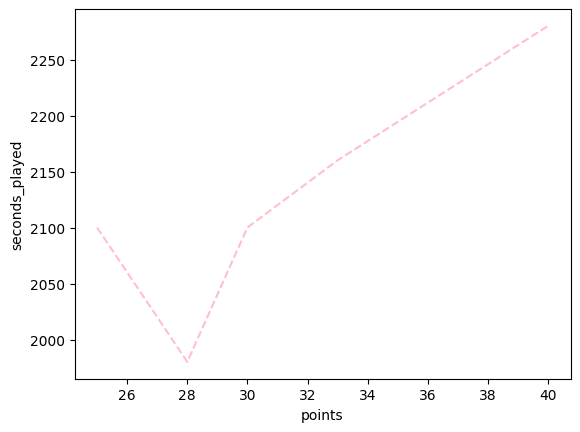

In [221]:
sns.lineplot(data=data, x="points", y="seconds_played", color="pink", linestyle="--")

assists to turnovers ratio

In [222]:
data["assistsToTurnOver"] = data["assists"] / (data["turnovers"])
data

/tmp/ipython-input-422694693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["assistsToTurnOver"] = data["assists"] / (data["turnovers"])


,player,game,points,assists,turnovers,seconds_played,PointsPerSeconds,assistsToTurnOver
0,LeBron James,1,25.0,8.0,3,2100,0.011905,2.666667
1,LeBron James,2,30.0,7.0,2,2100,0.014286,3.500000
2,LeBron James,3,28.0,9.0,2,1980,0.014141,4.500000
3,Stephen Curry,1,28.0,32.0,4,1980,0.014141,8.000000
4,Stephen Curry,2,33.0,10.0,3,2160,0.015278,3.333333
5,Kobe Bryant,1,40.0,5.0,2,2280,0.017544,2.500000


<Axes: xlabel='assists', ylabel='turnovers'>

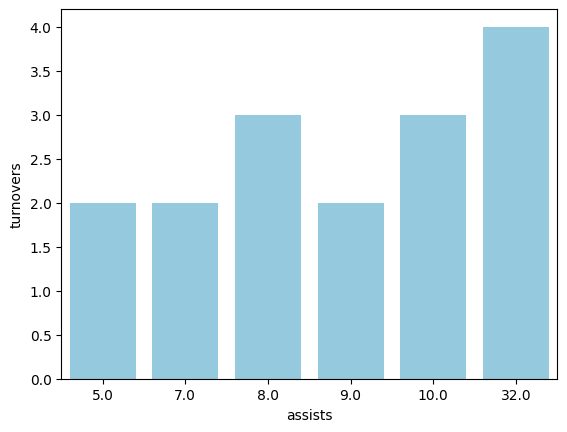

In [226]:
sns.barplot(data=data, x="assists", y="turnovers", color="skyblue")

Custome efficiency score

In [227]:
data["CustomeEfficienceyScore"] = (data["PointsPerSeconds"] * 50) / (data["assistsToTurnOver"] * 10)
data

/tmp/ipython-input-4144229234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CustomeEfficienceyScore"] = (data["PointsPerSeconds"] * 50) / (data["assistsToTurnOver"] * 10)


,player,game,points,assists,turnovers,seconds_played,PointsPerSeconds,assistsToTurnOver,CustomeEfficienceyScore
0,LeBron James,1,25.0,8.0,3,2100,0.011905,2.666667,0.022321
1,LeBron James,2,30.0,7.0,2,2100,0.014286,3.500000,0.020408
2,LeBron James,3,28.0,9.0,2,1980,0.014141,4.500000,0.015713
3,Stephen Curry,1,28.0,32.0,4,1980,0.014141,8.000000,0.008838
4,Stephen Curry,2,33.0,10.0,3,2160,0.015278,3.333333,0.022917
5,Kobe Bryant,1,40.0,5.0,2,2280,0.017544,2.500000,0.035088


In [228]:
def player_metrice(X):
  dictionary = dict()
  (X["points"].mean())
  arr.append(X["assists"].mean())
  arr.append(X["turnovers"].mean())
  arr.append(X["seconds_played"].mean())

  return arr

all_player = data.groupby("player").apply(player_metrice)
all_player

/tmp/ipython-input-2736534742.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_player = data.groupby("player").apply(player_metrice)


,0
player,
Kobe Bryant,"[40.0, 5.0, 2.0, 2280.0]"
LeBron James,"[27.666666666666668, 8.0, 2.3333333333333335, ..."
Stephen Curry,"[30.5, 21.0, 3.5, 2070.0]"


Player metrices

In [231]:
def player_metrice(X):

  dictionary = dict()
  dictionary["points"] = X["points"].mean()
  dictionary["assists"] = X["assists"].mean()
  dictionary["turnovers"] = X["turnovers"].mean()
  dictionary["seconds_played"] = X["seconds_played"].mean()

  return dictionary

all_player = data.groupby("player").apply(player_metrice)
all_player

/tmp/ipython-input-1155797444.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_player = data.groupby("player").apply(player_metrice)


,0
player,
Kobe Bryant,"{'points': 40.0, 'assists': 5.0, 'turnovers': ..."
LeBron James,"{'points': 27.666666666666668, 'assists': 8.0,..."
Stephen Curry,"{'points': 30.5, 'assists': 21.0, 'turnovers':..."


Checking each record of player seperately

In [234]:
for player_name in data["player"].unique():
  print(f"Records for {player_name}:")
  display(data[data["player"] == player_name])

Records for LeBron James:


,player,game,points,assists,turnovers,seconds_played,PointsPerSeconds,assistsToTurnOver,CustomeEfficienceyScore
0,LeBron James,1,25.0,8.0,3,2100,0.011905,2.666667,0.022321
1,LeBron James,2,30.0,7.0,2,2100,0.014286,3.500000,0.020408
2,LeBron James,3,28.0,9.0,2,1980,0.014141,4.500000,0.015713


Records for Stephen Curry:


,player,game,points,assists,turnovers,seconds_played,PointsPerSeconds,assistsToTurnOver,CustomeEfficienceyScore
3,Stephen Curry,1,28.0,32.0,4,1980,0.014141,8.000000,0.008838
4,Stephen Curry,2,33.0,10.0,3,2160,0.015278,3.333333,0.022917


Records for Kobe Bryant:


,player,game,points,assists,turnovers,seconds_played,PointsPerSeconds,assistsToTurnOver,CustomeEfficienceyScore
5,Kobe Bryant,1,40.0,5.0,2,2280,0.017544,2.5,0.035088


### Average Assists to Turnover Ratio per Player

          player  assistsToTurnOver
0    Kobe Bryant           2.500000
1   LeBron James           3.555556
2  Stephen Curry           5.666667


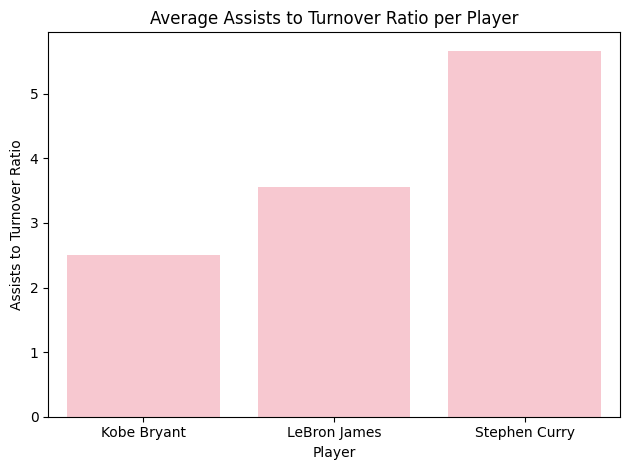

In [242]:
average_assists_to_turnover = data.groupby("player")["assistsToTurnOver"].mean().reset_index()
print(average_assists_to_turnover)
sns.barplot(x="player", y="assistsToTurnOver", data=average_assists_to_turnover, color="pink")
plt.title("Average Assists to Turnover Ratio per Player")
plt.ylabel("Assists to Turnover Ratio")
plt.xlabel("Player")
plt.tight_layout()
plt.show()